In [139]:
import torch
import torchvision
import torchvision.transforms as transforms
import torchvision.models as models

transform = transforms.Compose(
    [transforms.Resize((224, 224)),
    transforms.ToTensor()])
norm = transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010))

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                            download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=128,
                                              shuffle=True, num_workers=24)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                           download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=1,
                                             shuffle=False, num_workers=0)
model = models.resnet18(num_classes=10)
model.load_state_dict(torch.load("./cifar_net84.pth"))
model.eval()

Files already downloaded and verified
Files already downloaded and verified


ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [48]:
%matplotlib inline
import matplotlib.pyplot as plt
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
class SaveFeatures():
    def __init__(self, module):
        self.hook = module.register_forward_hook(self.hook_fn)
    def hook_fn(self, module, input, output):
        self.features = output
    def close(self):
        self.hook.remove()

In [70]:
import numpy as np
img = np.uint8(np.random.uniform(150, 180, (1, 3, 224, 224)))/255  # generate random image
img.shape

(1, 3, 224, 224)

In [180]:
from tqdm.notebook import trange, tqdm
layer = list(list(model.children())[7].children())[1].conv2
activations = SaveFeatures(layer)

model.to(device)

img_for_plot = None
#testloader.dataset[0]
# for i,(temp_img,label) in enumerate(testloader):
#     img_for_plot = temp_img.clone()
#     temp_img = norm(temp_img[0,:,:,:])
#     temp_img = temp_img.to(device)
#     model(temp_img.expand(1,-1,-1,-1))
max_index = 0
max_value = 0
max_activation_image = None
max_activation_input = None
for i in trange(10000):
    temp_img,label = testloader.dataset[i]
    img_for_plot = temp_img.clone()
    temp_img = norm(temp_img)
    temp_img = temp_img.to(device)
    input = temp_img.expand(1,-1,-1,-1)
    model(input)
    print(activations.features[0, 0].sum())
    v = activations.features[0, 0].sum()
    if i == 0:
        max_value = v
    else:
        if v > max_value:
            max_index = i
            max_value = v
            max_activation_image = img_for_plot.clone()
            max_activation_input = input.clone()
    
    

    
print(max_index)

tensor(-1.5597, device='cuda:0', grad_fn=<SumBackward0>)
tensor(8.3852, device='cuda:0', grad_fn=<SumBackward0>)
tensor(7.1775, device='cuda:0', grad_fn=<SumBackward0>)
tensor(2.4884, device='cuda:0', grad_fn=<SumBackward0>)
tensor(0.3981, device='cuda:0', grad_fn=<SumBackward0>)
tensor(0.1886, device='cuda:0', grad_fn=<SumBackward0>)
tensor(2.1635, device='cuda:0', grad_fn=<SumBackward0>)
tensor(0.7248, device='cuda:0', grad_fn=<SumBackward0>)
tensor(-3.2840, device='cuda:0', grad_fn=<SumBackward0>)
tensor(4.3929, device='cuda:0', grad_fn=<SumBackward0>)
tensor(-1.1700, device='cuda:0', grad_fn=<SumBackward0>)
tensor(8.0513, device='cuda:0', grad_fn=<SumBackward0>)
tensor(-0.5626, device='cuda:0', grad_fn=<SumBackward0>)
tensor(-2.2239, device='cuda:0', grad_fn=<SumBackward0>)
tensor(6.0355, device='cuda:0', grad_fn=<SumBackward0>)
tensor(2.2631, device='cuda:0', grad_fn=<SumBackward0>)
tensor(0.4702, device='cuda:0', grad_fn=<SumBackward0>)
tensor(-2.2806, device='cuda:0', grad_fn=<S

tensor(6.4240, device='cuda:0', grad_fn=<SumBackward0>)
tensor(0.2208, device='cuda:0', grad_fn=<SumBackward0>)
tensor(-0.2354, device='cuda:0', grad_fn=<SumBackward0>)
tensor(7.1153, device='cuda:0', grad_fn=<SumBackward0>)
tensor(-0.7901, device='cuda:0', grad_fn=<SumBackward0>)
tensor(-1.1706, device='cuda:0', grad_fn=<SumBackward0>)
tensor(0.5418, device='cuda:0', grad_fn=<SumBackward0>)
tensor(2.4247, device='cuda:0', grad_fn=<SumBackward0>)
tensor(1.3210, device='cuda:0', grad_fn=<SumBackward0>)
tensor(-1.1634, device='cuda:0', grad_fn=<SumBackward0>)
tensor(2.2628, device='cuda:0', grad_fn=<SumBackward0>)
tensor(0.8677, device='cuda:0', grad_fn=<SumBackward0>)
tensor(-0.9050, device='cuda:0', grad_fn=<SumBackward0>)
tensor(1.9394, device='cuda:0', grad_fn=<SumBackward0>)
tensor(-0.1650, device='cuda:0', grad_fn=<SumBackward0>)
tensor(5.0891, device='cuda:0', grad_fn=<SumBackward0>)
tensor(6.1657, device='cuda:0', grad_fn=<SumBackward0>)
tensor(0.8767, device='cuda:0', grad_fn=<S

tensor(-2.0115, device='cuda:0', grad_fn=<SumBackward0>)
tensor(0.3061, device='cuda:0', grad_fn=<SumBackward0>)
tensor(6.2169, device='cuda:0', grad_fn=<SumBackward0>)
tensor(0.2018, device='cuda:0', grad_fn=<SumBackward0>)
tensor(1.3266, device='cuda:0', grad_fn=<SumBackward0>)
tensor(5.1514, device='cuda:0', grad_fn=<SumBackward0>)
tensor(-2.0802, device='cuda:0', grad_fn=<SumBackward0>)
tensor(-0.2207, device='cuda:0', grad_fn=<SumBackward0>)
tensor(6.8468, device='cuda:0', grad_fn=<SumBackward0>)
tensor(0.6309, device='cuda:0', grad_fn=<SumBackward0>)
tensor(3.1794, device='cuda:0', grad_fn=<SumBackward0>)
tensor(6.1948, device='cuda:0', grad_fn=<SumBackward0>)
tensor(0.6464, device='cuda:0', grad_fn=<SumBackward0>)
tensor(-1.1726, device='cuda:0', grad_fn=<SumBackward0>)
tensor(5.5739, device='cuda:0', grad_fn=<SumBackward0>)
tensor(1.8347, device='cuda:0', grad_fn=<SumBackward0>)
tensor(-6.1954, device='cuda:0', grad_fn=<SumBackward0>)
tensor(-0.8477, device='cuda:0', grad_fn=<S

tensor(-0.1236, device='cuda:0', grad_fn=<SumBackward0>)
tensor(9.7206, device='cuda:0', grad_fn=<SumBackward0>)
tensor(-1.0449, device='cuda:0', grad_fn=<SumBackward0>)
tensor(1.9904, device='cuda:0', grad_fn=<SumBackward0>)
tensor(-0.1876, device='cuda:0', grad_fn=<SumBackward0>)
tensor(6.5482, device='cuda:0', grad_fn=<SumBackward0>)
tensor(-1.0657, device='cuda:0', grad_fn=<SumBackward0>)
tensor(0.9388, device='cuda:0', grad_fn=<SumBackward0>)
tensor(-1.0722, device='cuda:0', grad_fn=<SumBackward0>)
tensor(-1.0266, device='cuda:0', grad_fn=<SumBackward0>)
tensor(5.6822, device='cuda:0', grad_fn=<SumBackward0>)
tensor(-1.6730, device='cuda:0', grad_fn=<SumBackward0>)
tensor(0.7427, device='cuda:0', grad_fn=<SumBackward0>)
tensor(2.8189, device='cuda:0', grad_fn=<SumBackward0>)
tensor(3.0884, device='cuda:0', grad_fn=<SumBackward0>)
tensor(-0.3120, device='cuda:0', grad_fn=<SumBackward0>)
tensor(3.0328, device='cuda:0', grad_fn=<SumBackward0>)
tensor(4.8822, device='cuda:0', grad_fn=

tensor(6.2748, device='cuda:0', grad_fn=<SumBackward0>)
tensor(0.6959, device='cuda:0', grad_fn=<SumBackward0>)
tensor(-5.5053, device='cuda:0', grad_fn=<SumBackward0>)
tensor(0.8572, device='cuda:0', grad_fn=<SumBackward0>)
tensor(5.4784, device='cuda:0', grad_fn=<SumBackward0>)
tensor(2.0470, device='cuda:0', grad_fn=<SumBackward0>)
tensor(-1.1058, device='cuda:0', grad_fn=<SumBackward0>)
tensor(-1.0650, device='cuda:0', grad_fn=<SumBackward0>)
tensor(-0.0876, device='cuda:0', grad_fn=<SumBackward0>)
tensor(-3.8779, device='cuda:0', grad_fn=<SumBackward0>)
tensor(-3.3677, device='cuda:0', grad_fn=<SumBackward0>)
tensor(3.4686, device='cuda:0', grad_fn=<SumBackward0>)
tensor(-1.4929, device='cuda:0', grad_fn=<SumBackward0>)
tensor(-1.6631, device='cuda:0', grad_fn=<SumBackward0>)
tensor(8.2349, device='cuda:0', grad_fn=<SumBackward0>)
tensor(5.9067, device='cuda:0', grad_fn=<SumBackward0>)
tensor(7.5860, device='cuda:0', grad_fn=<SumBackward0>)
tensor(5.9789, device='cuda:0', grad_fn=

tensor(-0.8157, device='cuda:0', grad_fn=<SumBackward0>)
tensor(-0.1504, device='cuda:0', grad_fn=<SumBackward0>)
tensor(2.3709, device='cuda:0', grad_fn=<SumBackward0>)
tensor(0.6105, device='cuda:0', grad_fn=<SumBackward0>)
tensor(1.1051, device='cuda:0', grad_fn=<SumBackward0>)
tensor(2.7148, device='cuda:0', grad_fn=<SumBackward0>)
tensor(-0.1114, device='cuda:0', grad_fn=<SumBackward0>)
tensor(9.6253, device='cuda:0', grad_fn=<SumBackward0>)
tensor(8.3826, device='cuda:0', grad_fn=<SumBackward0>)
tensor(6.6030, device='cuda:0', grad_fn=<SumBackward0>)
tensor(4.0722, device='cuda:0', grad_fn=<SumBackward0>)
tensor(1.8047, device='cuda:0', grad_fn=<SumBackward0>)
tensor(-1.0160, device='cuda:0', grad_fn=<SumBackward0>)
tensor(3.1542, device='cuda:0', grad_fn=<SumBackward0>)
tensor(9.5864, device='cuda:0', grad_fn=<SumBackward0>)
tensor(5.1941, device='cuda:0', grad_fn=<SumBackward0>)
tensor(-3.6717, device='cuda:0', grad_fn=<SumBackward0>)
tensor(6.0250, device='cuda:0', grad_fn=<Su

tensor(5.3385, device='cuda:0', grad_fn=<SumBackward0>)
tensor(0.5923, device='cuda:0', grad_fn=<SumBackward0>)
tensor(7.9155, device='cuda:0', grad_fn=<SumBackward0>)
tensor(6.5097, device='cuda:0', grad_fn=<SumBackward0>)
tensor(1.8181, device='cuda:0', grad_fn=<SumBackward0>)
tensor(-1.5066, device='cuda:0', grad_fn=<SumBackward0>)
tensor(0.0054, device='cuda:0', grad_fn=<SumBackward0>)
tensor(5.7573, device='cuda:0', grad_fn=<SumBackward0>)
tensor(-0.4798, device='cuda:0', grad_fn=<SumBackward0>)
tensor(2.2114, device='cuda:0', grad_fn=<SumBackward0>)
tensor(3.6811, device='cuda:0', grad_fn=<SumBackward0>)
tensor(5.4492, device='cuda:0', grad_fn=<SumBackward0>)
tensor(4.1100, device='cuda:0', grad_fn=<SumBackward0>)
tensor(0.6531, device='cuda:0', grad_fn=<SumBackward0>)
tensor(-3.1206, device='cuda:0', grad_fn=<SumBackward0>)
tensor(-1.2371, device='cuda:0', grad_fn=<SumBackward0>)
tensor(0.3128, device='cuda:0', grad_fn=<SumBackward0>)
tensor(-0.4524, device='cuda:0', grad_fn=<Su

tensor(-2.1964, device='cuda:0', grad_fn=<SumBackward0>)
tensor(6.7895, device='cuda:0', grad_fn=<SumBackward0>)
tensor(0.8162, device='cuda:0', grad_fn=<SumBackward0>)
tensor(-1.9156, device='cuda:0', grad_fn=<SumBackward0>)
tensor(-0.9085, device='cuda:0', grad_fn=<SumBackward0>)
tensor(1.6174, device='cuda:0', grad_fn=<SumBackward0>)
tensor(-1.8665, device='cuda:0', grad_fn=<SumBackward0>)
tensor(2.3890, device='cuda:0', grad_fn=<SumBackward0>)
tensor(0.4316, device='cuda:0', grad_fn=<SumBackward0>)
tensor(8.1141, device='cuda:0', grad_fn=<SumBackward0>)
tensor(2.3916, device='cuda:0', grad_fn=<SumBackward0>)
tensor(-0.5975, device='cuda:0', grad_fn=<SumBackward0>)
tensor(6.5254, device='cuda:0', grad_fn=<SumBackward0>)
tensor(3.0718, device='cuda:0', grad_fn=<SumBackward0>)
tensor(-0.2269, device='cuda:0', grad_fn=<SumBackward0>)
tensor(6.9934, device='cuda:0', grad_fn=<SumBackward0>)
tensor(-0.2833, device='cuda:0', grad_fn=<SumBackward0>)
tensor(0.4513, device='cuda:0', grad_fn=<

tensor(-0.1326, device='cuda:0', grad_fn=<SumBackward0>)
tensor(1.4359, device='cuda:0', grad_fn=<SumBackward0>)
tensor(1.1516, device='cuda:0', grad_fn=<SumBackward0>)
tensor(4.9235, device='cuda:0', grad_fn=<SumBackward0>)
tensor(-0.0442, device='cuda:0', grad_fn=<SumBackward0>)
tensor(-1.1058, device='cuda:0', grad_fn=<SumBackward0>)
tensor(-6.3840, device='cuda:0', grad_fn=<SumBackward0>)
tensor(3.8220, device='cuda:0', grad_fn=<SumBackward0>)
tensor(-5.2317, device='cuda:0', grad_fn=<SumBackward0>)
tensor(-0.9965, device='cuda:0', grad_fn=<SumBackward0>)
tensor(2.0477, device='cuda:0', grad_fn=<SumBackward0>)
tensor(-0.7254, device='cuda:0', grad_fn=<SumBackward0>)
tensor(1.3704, device='cuda:0', grad_fn=<SumBackward0>)
tensor(3.5452, device='cuda:0', grad_fn=<SumBackward0>)
tensor(5.9407, device='cuda:0', grad_fn=<SumBackward0>)
tensor(-1.1346, device='cuda:0', grad_fn=<SumBackward0>)
tensor(4.3590, device='cuda:0', grad_fn=<SumBackward0>)
tensor(-3.4581, device='cuda:0', grad_fn

tensor(-0.4729, device='cuda:0', grad_fn=<SumBackward0>)
tensor(-1.3132, device='cuda:0', grad_fn=<SumBackward0>)
tensor(-1.0815, device='cuda:0', grad_fn=<SumBackward0>)
tensor(-0.1961, device='cuda:0', grad_fn=<SumBackward0>)
tensor(1.0412, device='cuda:0', grad_fn=<SumBackward0>)
tensor(-4.7614, device='cuda:0', grad_fn=<SumBackward0>)
tensor(7.9588, device='cuda:0', grad_fn=<SumBackward0>)
tensor(-2.9516, device='cuda:0', grad_fn=<SumBackward0>)
tensor(1.0074, device='cuda:0', grad_fn=<SumBackward0>)
tensor(-4.5356, device='cuda:0', grad_fn=<SumBackward0>)
tensor(5.5594, device='cuda:0', grad_fn=<SumBackward0>)
tensor(5.9961, device='cuda:0', grad_fn=<SumBackward0>)
tensor(-0.4353, device='cuda:0', grad_fn=<SumBackward0>)
tensor(1.4349, device='cuda:0', grad_fn=<SumBackward0>)
tensor(3.2695, device='cuda:0', grad_fn=<SumBackward0>)
tensor(1.5824, device='cuda:0', grad_fn=<SumBackward0>)
tensor(-2.8085, device='cuda:0', grad_fn=<SumBackward0>)
tensor(-4.4742, device='cuda:0', grad_f

tensor(-1.7950, device='cuda:0', grad_fn=<SumBackward0>)
tensor(1.2261, device='cuda:0', grad_fn=<SumBackward0>)
tensor(6.2225, device='cuda:0', grad_fn=<SumBackward0>)
tensor(3.6704, device='cuda:0', grad_fn=<SumBackward0>)
tensor(-2.3764, device='cuda:0', grad_fn=<SumBackward0>)
tensor(-2.2701, device='cuda:0', grad_fn=<SumBackward0>)
tensor(4.9692, device='cuda:0', grad_fn=<SumBackward0>)
tensor(6.1839, device='cuda:0', grad_fn=<SumBackward0>)
tensor(-3.1875, device='cuda:0', grad_fn=<SumBackward0>)
tensor(0.5872, device='cuda:0', grad_fn=<SumBackward0>)
tensor(4.3612, device='cuda:0', grad_fn=<SumBackward0>)
tensor(8.4829, device='cuda:0', grad_fn=<SumBackward0>)
tensor(-0.7061, device='cuda:0', grad_fn=<SumBackward0>)
tensor(1.4883, device='cuda:0', grad_fn=<SumBackward0>)
tensor(1.2527, device='cuda:0', grad_fn=<SumBackward0>)
tensor(3.6611, device='cuda:0', grad_fn=<SumBackward0>)
tensor(6.8523, device='cuda:0', grad_fn=<SumBackward0>)
tensor(-1.4458, device='cuda:0', grad_fn=<S

tensor(-1.3145, device='cuda:0', grad_fn=<SumBackward0>)
tensor(1.6930, device='cuda:0', grad_fn=<SumBackward0>)
tensor(-0.2297, device='cuda:0', grad_fn=<SumBackward0>)
tensor(-0.2107, device='cuda:0', grad_fn=<SumBackward0>)
tensor(-1.8993, device='cuda:0', grad_fn=<SumBackward0>)
tensor(0.3565, device='cuda:0', grad_fn=<SumBackward0>)
tensor(-5.1997, device='cuda:0', grad_fn=<SumBackward0>)
tensor(1.0336, device='cuda:0', grad_fn=<SumBackward0>)
tensor(1.5494, device='cuda:0', grad_fn=<SumBackward0>)
tensor(-0.1456, device='cuda:0', grad_fn=<SumBackward0>)
tensor(-1.7617, device='cuda:0', grad_fn=<SumBackward0>)
tensor(0.3944, device='cuda:0', grad_fn=<SumBackward0>)
tensor(-1.4173, device='cuda:0', grad_fn=<SumBackward0>)
tensor(-0.7855, device='cuda:0', grad_fn=<SumBackward0>)
tensor(-1.8224, device='cuda:0', grad_fn=<SumBackward0>)
tensor(6.6207, device='cuda:0', grad_fn=<SumBackward0>)
tensor(5.0517, device='cuda:0', grad_fn=<SumBackward0>)
tensor(1.8777, device='cuda:0', grad_f

tensor(-0.8011, device='cuda:0', grad_fn=<SumBackward0>)
tensor(-2.0305, device='cuda:0', grad_fn=<SumBackward0>)
tensor(-3.5395, device='cuda:0', grad_fn=<SumBackward0>)
tensor(0.3501, device='cuda:0', grad_fn=<SumBackward0>)
tensor(-0.5440, device='cuda:0', grad_fn=<SumBackward0>)
tensor(4.4858, device='cuda:0', grad_fn=<SumBackward0>)
tensor(1.6786, device='cuda:0', grad_fn=<SumBackward0>)
tensor(6.1697, device='cuda:0', grad_fn=<SumBackward0>)
tensor(7.5435, device='cuda:0', grad_fn=<SumBackward0>)
tensor(-1.1475, device='cuda:0', grad_fn=<SumBackward0>)
tensor(0.5392, device='cuda:0', grad_fn=<SumBackward0>)
tensor(-0.1699, device='cuda:0', grad_fn=<SumBackward0>)
tensor(3.7236, device='cuda:0', grad_fn=<SumBackward0>)
tensor(0.0254, device='cuda:0', grad_fn=<SumBackward0>)
tensor(1.2958, device='cuda:0', grad_fn=<SumBackward0>)
tensor(-0.3964, device='cuda:0', grad_fn=<SumBackward0>)
tensor(1.5311, device='cuda:0', grad_fn=<SumBackward0>)
tensor(0.7520, device='cuda:0', grad_fn=<

tensor(2.9906, device='cuda:0', grad_fn=<SumBackward0>)
tensor(1.1702, device='cuda:0', grad_fn=<SumBackward0>)
tensor(6.5831, device='cuda:0', grad_fn=<SumBackward0>)
tensor(2.3254, device='cuda:0', grad_fn=<SumBackward0>)
tensor(-0.3268, device='cuda:0', grad_fn=<SumBackward0>)
tensor(1.1842, device='cuda:0', grad_fn=<SumBackward0>)
tensor(3.5522, device='cuda:0', grad_fn=<SumBackward0>)
tensor(-3.3747, device='cuda:0', grad_fn=<SumBackward0>)
tensor(-3.4221, device='cuda:0', grad_fn=<SumBackward0>)
tensor(0.5006, device='cuda:0', grad_fn=<SumBackward0>)
tensor(-0.9103, device='cuda:0', grad_fn=<SumBackward0>)
tensor(2.0493, device='cuda:0', grad_fn=<SumBackward0>)
tensor(3.0135, device='cuda:0', grad_fn=<SumBackward0>)
tensor(0.3408, device='cuda:0', grad_fn=<SumBackward0>)
tensor(3.2733, device='cuda:0', grad_fn=<SumBackward0>)
tensor(-0.5331, device='cuda:0', grad_fn=<SumBackward0>)
tensor(-4.3778, device='cuda:0', grad_fn=<SumBackward0>)
tensor(-0.9406, device='cuda:0', grad_fn=<

tensor(0.0660, device='cuda:0', grad_fn=<SumBackward0>)
tensor(2.6931, device='cuda:0', grad_fn=<SumBackward0>)
tensor(3.2476, device='cuda:0', grad_fn=<SumBackward0>)
tensor(-4.2964, device='cuda:0', grad_fn=<SumBackward0>)
tensor(-5.0618, device='cuda:0', grad_fn=<SumBackward0>)
tensor(0.0913, device='cuda:0', grad_fn=<SumBackward0>)
tensor(-0.0675, device='cuda:0', grad_fn=<SumBackward0>)
tensor(8.5092, device='cuda:0', grad_fn=<SumBackward0>)
tensor(7.1592, device='cuda:0', grad_fn=<SumBackward0>)
tensor(-0.1327, device='cuda:0', grad_fn=<SumBackward0>)
tensor(6.0739, device='cuda:0', grad_fn=<SumBackward0>)
tensor(1.7400, device='cuda:0', grad_fn=<SumBackward0>)
tensor(5.0259, device='cuda:0', grad_fn=<SumBackward0>)
tensor(1.3697, device='cuda:0', grad_fn=<SumBackward0>)
tensor(2.5302, device='cuda:0', grad_fn=<SumBackward0>)
tensor(-0.0861, device='cuda:0', grad_fn=<SumBackward0>)
tensor(-1.2316, device='cuda:0', grad_fn=<SumBackward0>)
tensor(-1.1747, device='cuda:0', grad_fn=<

tensor(-1.9360, device='cuda:0', grad_fn=<SumBackward0>)
tensor(5.7544, device='cuda:0', grad_fn=<SumBackward0>)
tensor(-1.9209, device='cuda:0', grad_fn=<SumBackward0>)
tensor(-1.5740, device='cuda:0', grad_fn=<SumBackward0>)
tensor(-0.9119, device='cuda:0', grad_fn=<SumBackward0>)
tensor(-0.3979, device='cuda:0', grad_fn=<SumBackward0>)
tensor(0.8542, device='cuda:0', grad_fn=<SumBackward0>)
tensor(-1.2341, device='cuda:0', grad_fn=<SumBackward0>)
tensor(0.7056, device='cuda:0', grad_fn=<SumBackward0>)
tensor(1.5879, device='cuda:0', grad_fn=<SumBackward0>)
tensor(3.9545, device='cuda:0', grad_fn=<SumBackward0>)
tensor(6.8617, device='cuda:0', grad_fn=<SumBackward0>)
tensor(-0.0571, device='cuda:0', grad_fn=<SumBackward0>)
tensor(6.5075, device='cuda:0', grad_fn=<SumBackward0>)
tensor(4.4076, device='cuda:0', grad_fn=<SumBackward0>)
tensor(5.5243, device='cuda:0', grad_fn=<SumBackward0>)
tensor(0.3543, device='cuda:0', grad_fn=<SumBackward0>)
tensor(0.7810, device='cuda:0', grad_fn=<

tensor(0.9267, device='cuda:0', grad_fn=<SumBackward0>)
tensor(1.3526, device='cuda:0', grad_fn=<SumBackward0>)
tensor(-0.8477, device='cuda:0', grad_fn=<SumBackward0>)
tensor(-2.2330, device='cuda:0', grad_fn=<SumBackward0>)
tensor(-5.1377, device='cuda:0', grad_fn=<SumBackward0>)
tensor(-1.5611, device='cuda:0', grad_fn=<SumBackward0>)
tensor(-0.9486, device='cuda:0', grad_fn=<SumBackward0>)
tensor(7.8241, device='cuda:0', grad_fn=<SumBackward0>)
tensor(-0.1798, device='cuda:0', grad_fn=<SumBackward0>)
tensor(5.7372, device='cuda:0', grad_fn=<SumBackward0>)
tensor(-0.8952, device='cuda:0', grad_fn=<SumBackward0>)
tensor(4.6830, device='cuda:0', grad_fn=<SumBackward0>)
tensor(-0.0699, device='cuda:0', grad_fn=<SumBackward0>)
tensor(0.6712, device='cuda:0', grad_fn=<SumBackward0>)
tensor(-4.4543, device='cuda:0', grad_fn=<SumBackward0>)
tensor(-2.2705, device='cuda:0', grad_fn=<SumBackward0>)
tensor(4.4038, device='cuda:0', grad_fn=<SumBackward0>)
tensor(-7.0913, device='cuda:0', grad_

tensor(3.4512, device='cuda:0', grad_fn=<SumBackward0>)
tensor(7.1400, device='cuda:0', grad_fn=<SumBackward0>)
tensor(4.9896, device='cuda:0', grad_fn=<SumBackward0>)
tensor(-1.7047, device='cuda:0', grad_fn=<SumBackward0>)
tensor(1.6768, device='cuda:0', grad_fn=<SumBackward0>)
tensor(-0.9762, device='cuda:0', grad_fn=<SumBackward0>)
tensor(-1.2614, device='cuda:0', grad_fn=<SumBackward0>)
tensor(0.4836, device='cuda:0', grad_fn=<SumBackward0>)
tensor(-0.1191, device='cuda:0', grad_fn=<SumBackward0>)
tensor(-0.3127, device='cuda:0', grad_fn=<SumBackward0>)
tensor(1.2342, device='cuda:0', grad_fn=<SumBackward0>)
tensor(-0.9903, device='cuda:0', grad_fn=<SumBackward0>)
tensor(0.6151, device='cuda:0', grad_fn=<SumBackward0>)
tensor(-0.0359, device='cuda:0', grad_fn=<SumBackward0>)
tensor(7.3712, device='cuda:0', grad_fn=<SumBackward0>)
tensor(6.4633, device='cuda:0', grad_fn=<SumBackward0>)
tensor(0.5419, device='cuda:0', grad_fn=<SumBackward0>)
tensor(2.7186, device='cuda:0', grad_fn=<

tensor(1.0245, device='cuda:0', grad_fn=<SumBackward0>)
tensor(0.0977, device='cuda:0', grad_fn=<SumBackward0>)
tensor(2.3139, device='cuda:0', grad_fn=<SumBackward0>)
tensor(1.0330, device='cuda:0', grad_fn=<SumBackward0>)
tensor(0.8588, device='cuda:0', grad_fn=<SumBackward0>)
tensor(3.3592, device='cuda:0', grad_fn=<SumBackward0>)
tensor(6.0526, device='cuda:0', grad_fn=<SumBackward0>)
tensor(-0.7312, device='cuda:0', grad_fn=<SumBackward0>)
tensor(-3.0613, device='cuda:0', grad_fn=<SumBackward0>)
tensor(-0.2272, device='cuda:0', grad_fn=<SumBackward0>)
tensor(3.9222, device='cuda:0', grad_fn=<SumBackward0>)
tensor(-1.7269, device='cuda:0', grad_fn=<SumBackward0>)
tensor(-1.2863, device='cuda:0', grad_fn=<SumBackward0>)
tensor(4.1297, device='cuda:0', grad_fn=<SumBackward0>)
tensor(-0.3161, device='cuda:0', grad_fn=<SumBackward0>)
tensor(3.8979, device='cuda:0', grad_fn=<SumBackward0>)
tensor(2.4051, device='cuda:0', grad_fn=<SumBackward0>)
tensor(-1.0912, device='cuda:0', grad_fn=<

tensor(-0.9944, device='cuda:0', grad_fn=<SumBackward0>)
tensor(-1.0418, device='cuda:0', grad_fn=<SumBackward0>)
tensor(4.0028, device='cuda:0', grad_fn=<SumBackward0>)
tensor(2.7995, device='cuda:0', grad_fn=<SumBackward0>)
tensor(0.6520, device='cuda:0', grad_fn=<SumBackward0>)
tensor(0.5827, device='cuda:0', grad_fn=<SumBackward0>)
tensor(1.7317, device='cuda:0', grad_fn=<SumBackward0>)
tensor(3.8841, device='cuda:0', grad_fn=<SumBackward0>)
tensor(-0.4499, device='cuda:0', grad_fn=<SumBackward0>)
tensor(0.7272, device='cuda:0', grad_fn=<SumBackward0>)
tensor(0.2532, device='cuda:0', grad_fn=<SumBackward0>)
tensor(5.8910, device='cuda:0', grad_fn=<SumBackward0>)
tensor(-0.7428, device='cuda:0', grad_fn=<SumBackward0>)
tensor(0.5992, device='cuda:0', grad_fn=<SumBackward0>)
tensor(2.2768, device='cuda:0', grad_fn=<SumBackward0>)
tensor(-0.7222, device='cuda:0', grad_fn=<SumBackward0>)
tensor(7.3412, device='cuda:0', grad_fn=<SumBackward0>)
tensor(-7.5685, device='cuda:0', grad_fn=<S

tensor(2.2203, device='cuda:0', grad_fn=<SumBackward0>)
tensor(7.1684, device='cuda:0', grad_fn=<SumBackward0>)
tensor(0.0706, device='cuda:0', grad_fn=<SumBackward0>)
tensor(7.0763, device='cuda:0', grad_fn=<SumBackward0>)
tensor(0.7789, device='cuda:0', grad_fn=<SumBackward0>)
tensor(6.6792, device='cuda:0', grad_fn=<SumBackward0>)
tensor(5.4669, device='cuda:0', grad_fn=<SumBackward0>)
tensor(1.3929, device='cuda:0', grad_fn=<SumBackward0>)
tensor(0.0019, device='cuda:0', grad_fn=<SumBackward0>)
tensor(2.7249, device='cuda:0', grad_fn=<SumBackward0>)
tensor(1.1400, device='cuda:0', grad_fn=<SumBackward0>)
tensor(-2.8810, device='cuda:0', grad_fn=<SumBackward0>)
tensor(-0.2083, device='cuda:0', grad_fn=<SumBackward0>)
tensor(-0.9165, device='cuda:0', grad_fn=<SumBackward0>)
tensor(1.7890, device='cuda:0', grad_fn=<SumBackward0>)
tensor(-1.3719, device='cuda:0', grad_fn=<SumBackward0>)
tensor(0.8581, device='cuda:0', grad_fn=<SumBackward0>)
tensor(-1.1154, device='cuda:0', grad_fn=<Su

tensor(8.0292, device='cuda:0', grad_fn=<SumBackward0>)
tensor(1.8512, device='cuda:0', grad_fn=<SumBackward0>)
tensor(1.2737, device='cuda:0', grad_fn=<SumBackward0>)
tensor(0.8391, device='cuda:0', grad_fn=<SumBackward0>)
tensor(-1.2439, device='cuda:0', grad_fn=<SumBackward0>)
tensor(8.8621, device='cuda:0', grad_fn=<SumBackward0>)
tensor(1.3204, device='cuda:0', grad_fn=<SumBackward0>)
tensor(0.1026, device='cuda:0', grad_fn=<SumBackward0>)
tensor(2.7678, device='cuda:0', grad_fn=<SumBackward0>)
tensor(-2.1913, device='cuda:0', grad_fn=<SumBackward0>)
tensor(5.7159, device='cuda:0', grad_fn=<SumBackward0>)
tensor(1.9904, device='cuda:0', grad_fn=<SumBackward0>)
tensor(2.7307, device='cuda:0', grad_fn=<SumBackward0>)
tensor(2.8216, device='cuda:0', grad_fn=<SumBackward0>)
tensor(9.3881, device='cuda:0', grad_fn=<SumBackward0>)
tensor(1.6959, device='cuda:0', grad_fn=<SumBackward0>)
tensor(2.2381, device='cuda:0', grad_fn=<SumBackward0>)
tensor(7.6088, device='cuda:0', grad_fn=<SumBa

tensor(-1.3423, device='cuda:0', grad_fn=<SumBackward0>)
tensor(8.2749, device='cuda:0', grad_fn=<SumBackward0>)
tensor(0.2066, device='cuda:0', grad_fn=<SumBackward0>)
tensor(-1.4028, device='cuda:0', grad_fn=<SumBackward0>)
tensor(-1.8628, device='cuda:0', grad_fn=<SumBackward0>)
tensor(-0.3478, device='cuda:0', grad_fn=<SumBackward0>)
tensor(2.0475, device='cuda:0', grad_fn=<SumBackward0>)
tensor(-0.2829, device='cuda:0', grad_fn=<SumBackward0>)
tensor(-1.5705, device='cuda:0', grad_fn=<SumBackward0>)
tensor(0.9489, device='cuda:0', grad_fn=<SumBackward0>)
tensor(-6.4154, device='cuda:0', grad_fn=<SumBackward0>)
tensor(3.6458, device='cuda:0', grad_fn=<SumBackward0>)
tensor(0.9887, device='cuda:0', grad_fn=<SumBackward0>)
tensor(-0.3774, device='cuda:0', grad_fn=<SumBackward0>)
tensor(4.0598, device='cuda:0', grad_fn=<SumBackward0>)
tensor(5.5040, device='cuda:0', grad_fn=<SumBackward0>)
tensor(-0.4716, device='cuda:0', grad_fn=<SumBackward0>)
tensor(0.5049, device='cuda:0', grad_fn

tensor(-1.2825, device='cuda:0', grad_fn=<SumBackward0>)
tensor(-2.9725, device='cuda:0', grad_fn=<SumBackward0>)
tensor(7.5108, device='cuda:0', grad_fn=<SumBackward0>)
tensor(0.0554, device='cuda:0', grad_fn=<SumBackward0>)
tensor(4.3166, device='cuda:0', grad_fn=<SumBackward0>)
tensor(0.4009, device='cuda:0', grad_fn=<SumBackward0>)
tensor(1.3527, device='cuda:0', grad_fn=<SumBackward0>)
tensor(3.8423, device='cuda:0', grad_fn=<SumBackward0>)
tensor(-2.7342, device='cuda:0', grad_fn=<SumBackward0>)
tensor(0.4291, device='cuda:0', grad_fn=<SumBackward0>)
tensor(-2.2607, device='cuda:0', grad_fn=<SumBackward0>)
tensor(3.4554, device='cuda:0', grad_fn=<SumBackward0>)
tensor(-1.8779, device='cuda:0', grad_fn=<SumBackward0>)
tensor(1.7641, device='cuda:0', grad_fn=<SumBackward0>)
tensor(6.9426, device='cuda:0', grad_fn=<SumBackward0>)
tensor(5.3562, device='cuda:0', grad_fn=<SumBackward0>)
tensor(5.3096, device='cuda:0', grad_fn=<SumBackward0>)
tensor(-1.6968, device='cuda:0', grad_fn=<S

tensor(4.5567, device='cuda:0', grad_fn=<SumBackward0>)
tensor(6.0657, device='cuda:0', grad_fn=<SumBackward0>)
tensor(-1.3861, device='cuda:0', grad_fn=<SumBackward0>)
tensor(2.1942, device='cuda:0', grad_fn=<SumBackward0>)
tensor(2.5952, device='cuda:0', grad_fn=<SumBackward0>)
tensor(-0.0718, device='cuda:0', grad_fn=<SumBackward0>)
tensor(-0.0488, device='cuda:0', grad_fn=<SumBackward0>)
tensor(-0.6394, device='cuda:0', grad_fn=<SumBackward0>)
tensor(6.2038, device='cuda:0', grad_fn=<SumBackward0>)
tensor(0.3660, device='cuda:0', grad_fn=<SumBackward0>)
tensor(-1.4274, device='cuda:0', grad_fn=<SumBackward0>)
tensor(7.5806, device='cuda:0', grad_fn=<SumBackward0>)
tensor(7.3153, device='cuda:0', grad_fn=<SumBackward0>)
tensor(0.9516, device='cuda:0', grad_fn=<SumBackward0>)
tensor(5.2396, device='cuda:0', grad_fn=<SumBackward0>)
tensor(8.2308, device='cuda:0', grad_fn=<SumBackward0>)
tensor(-1.3118, device='cuda:0', grad_fn=<SumBackward0>)
tensor(-2.0567, device='cuda:0', grad_fn=<

tensor(6.4396, device='cuda:0', grad_fn=<SumBackward0>)
tensor(-2.7153, device='cuda:0', grad_fn=<SumBackward0>)
tensor(7.1008, device='cuda:0', grad_fn=<SumBackward0>)
tensor(-0.6467, device='cuda:0', grad_fn=<SumBackward0>)
tensor(1.3358, device='cuda:0', grad_fn=<SumBackward0>)
tensor(-0.2989, device='cuda:0', grad_fn=<SumBackward0>)
tensor(-1.0538, device='cuda:0', grad_fn=<SumBackward0>)
tensor(0.1099, device='cuda:0', grad_fn=<SumBackward0>)
tensor(0.7433, device='cuda:0', grad_fn=<SumBackward0>)
tensor(-1.4362, device='cuda:0', grad_fn=<SumBackward0>)
tensor(8.0918, device='cuda:0', grad_fn=<SumBackward0>)
tensor(2.4302, device='cuda:0', grad_fn=<SumBackward0>)
tensor(2.0756, device='cuda:0', grad_fn=<SumBackward0>)
tensor(6.3337, device='cuda:0', grad_fn=<SumBackward0>)
tensor(-0.8000, device='cuda:0', grad_fn=<SumBackward0>)
tensor(-1.1205, device='cuda:0', grad_fn=<SumBackward0>)
tensor(-1.0007, device='cuda:0', grad_fn=<SumBackward0>)
tensor(1.1290, device='cuda:0', grad_fn=

tensor(5.3923, device='cuda:0', grad_fn=<SumBackward0>)
tensor(1.3498, device='cuda:0', grad_fn=<SumBackward0>)
tensor(3.9124, device='cuda:0', grad_fn=<SumBackward0>)
tensor(4.9708, device='cuda:0', grad_fn=<SumBackward0>)
tensor(0.3476, device='cuda:0', grad_fn=<SumBackward0>)
tensor(-2.3063, device='cuda:0', grad_fn=<SumBackward0>)
tensor(-3.1835, device='cuda:0', grad_fn=<SumBackward0>)
tensor(7.5655, device='cuda:0', grad_fn=<SumBackward0>)
tensor(4.0782, device='cuda:0', grad_fn=<SumBackward0>)
tensor(-1.8655, device='cuda:0', grad_fn=<SumBackward0>)
tensor(-1.0838, device='cuda:0', grad_fn=<SumBackward0>)
tensor(2.0154, device='cuda:0', grad_fn=<SumBackward0>)
tensor(-1.7502, device='cuda:0', grad_fn=<SumBackward0>)
tensor(4.9466, device='cuda:0', grad_fn=<SumBackward0>)
tensor(-3.2840, device='cuda:0', grad_fn=<SumBackward0>)
tensor(6.2624, device='cuda:0', grad_fn=<SumBackward0>)
tensor(0.9908, device='cuda:0', grad_fn=<SumBackward0>)
tensor(1.8290, device='cuda:0', grad_fn=<S

tensor(1.6119, device='cuda:0', grad_fn=<SumBackward0>)
tensor(-1.5688, device='cuda:0', grad_fn=<SumBackward0>)
tensor(5.6101, device='cuda:0', grad_fn=<SumBackward0>)
tensor(4.9042, device='cuda:0', grad_fn=<SumBackward0>)
tensor(3.2409, device='cuda:0', grad_fn=<SumBackward0>)
tensor(0.7591, device='cuda:0', grad_fn=<SumBackward0>)
tensor(2.6023, device='cuda:0', grad_fn=<SumBackward0>)
tensor(-4.7101, device='cuda:0', grad_fn=<SumBackward0>)
tensor(-0.6173, device='cuda:0', grad_fn=<SumBackward0>)
tensor(-1.6071, device='cuda:0', grad_fn=<SumBackward0>)
tensor(7.3875, device='cuda:0', grad_fn=<SumBackward0>)
tensor(-1.1651, device='cuda:0', grad_fn=<SumBackward0>)
tensor(-0.8384, device='cuda:0', grad_fn=<SumBackward0>)
tensor(1.4656, device='cuda:0', grad_fn=<SumBackward0>)
tensor(5.7273, device='cuda:0', grad_fn=<SumBackward0>)
tensor(3.1845, device='cuda:0', grad_fn=<SumBackward0>)
tensor(-0.5418, device='cuda:0', grad_fn=<SumBackward0>)
tensor(-3.2121, device='cuda:0', grad_fn=

tensor(6.6152, device='cuda:0', grad_fn=<SumBackward0>)
tensor(-0.0047, device='cuda:0', grad_fn=<SumBackward0>)
tensor(-2.0721, device='cuda:0', grad_fn=<SumBackward0>)
tensor(6.3813, device='cuda:0', grad_fn=<SumBackward0>)
tensor(-3.7024, device='cuda:0', grad_fn=<SumBackward0>)
tensor(6.3525, device='cuda:0', grad_fn=<SumBackward0>)
tensor(-0.6041, device='cuda:0', grad_fn=<SumBackward0>)
tensor(2.9340, device='cuda:0', grad_fn=<SumBackward0>)
tensor(-2.1484, device='cuda:0', grad_fn=<SumBackward0>)
tensor(1.6434, device='cuda:0', grad_fn=<SumBackward0>)
tensor(1.0216, device='cuda:0', grad_fn=<SumBackward0>)
tensor(-0.0835, device='cuda:0', grad_fn=<SumBackward0>)
tensor(7.9204, device='cuda:0', grad_fn=<SumBackward0>)
tensor(5.4357, device='cuda:0', grad_fn=<SumBackward0>)
tensor(1.2240, device='cuda:0', grad_fn=<SumBackward0>)
tensor(-2.1188, device='cuda:0', grad_fn=<SumBackward0>)
tensor(-0.9229, device='cuda:0', grad_fn=<SumBackward0>)
tensor(3.6962, device='cuda:0', grad_fn=

tensor(-0.2092, device='cuda:0', grad_fn=<SumBackward0>)
tensor(5.2482, device='cuda:0', grad_fn=<SumBackward0>)
tensor(0.5712, device='cuda:0', grad_fn=<SumBackward0>)
tensor(3.1853, device='cuda:0', grad_fn=<SumBackward0>)
tensor(0.1565, device='cuda:0', grad_fn=<SumBackward0>)
tensor(2.8411, device='cuda:0', grad_fn=<SumBackward0>)
tensor(0.0422, device='cuda:0', grad_fn=<SumBackward0>)
tensor(5.5552, device='cuda:0', grad_fn=<SumBackward0>)
tensor(6.7370, device='cuda:0', grad_fn=<SumBackward0>)
tensor(-2.6380, device='cuda:0', grad_fn=<SumBackward0>)
tensor(-0.9882, device='cuda:0', grad_fn=<SumBackward0>)
tensor(0.8556, device='cuda:0', grad_fn=<SumBackward0>)
tensor(1.5148, device='cuda:0', grad_fn=<SumBackward0>)
tensor(-0.8218, device='cuda:0', grad_fn=<SumBackward0>)
tensor(-0.2766, device='cuda:0', grad_fn=<SumBackward0>)
tensor(-1.1690, device='cuda:0', grad_fn=<SumBackward0>)
tensor(6.4283, device='cuda:0', grad_fn=<SumBackward0>)
tensor(2.6970, device='cuda:0', grad_fn=<S

tensor(-0.9842, device='cuda:0', grad_fn=<SumBackward0>)
tensor(6.1076, device='cuda:0', grad_fn=<SumBackward0>)
tensor(2.7763, device='cuda:0', grad_fn=<SumBackward0>)
tensor(-0.0721, device='cuda:0', grad_fn=<SumBackward0>)
tensor(4.5038, device='cuda:0', grad_fn=<SumBackward0>)
tensor(-0.0673, device='cuda:0', grad_fn=<SumBackward0>)
tensor(-2.7955, device='cuda:0', grad_fn=<SumBackward0>)
tensor(1.4397, device='cuda:0', grad_fn=<SumBackward0>)
tensor(-1.3679, device='cuda:0', grad_fn=<SumBackward0>)
tensor(4.6381, device='cuda:0', grad_fn=<SumBackward0>)
tensor(-3.1008, device='cuda:0', grad_fn=<SumBackward0>)
tensor(-0.6406, device='cuda:0', grad_fn=<SumBackward0>)
tensor(7.4531, device='cuda:0', grad_fn=<SumBackward0>)
tensor(1.3363, device='cuda:0', grad_fn=<SumBackward0>)
tensor(-1.2864, device='cuda:0', grad_fn=<SumBackward0>)
tensor(1.6347, device='cuda:0', grad_fn=<SumBackward0>)
tensor(-0.5183, device='cuda:0', grad_fn=<SumBackward0>)
tensor(5.6467, device='cuda:0', grad_fn

tensor(10.5318, device='cuda:0', grad_fn=<SumBackward0>)
tensor(2.5455, device='cuda:0', grad_fn=<SumBackward0>)
tensor(1.0534, device='cuda:0', grad_fn=<SumBackward0>)
tensor(2.9223, device='cuda:0', grad_fn=<SumBackward0>)
tensor(6.7881, device='cuda:0', grad_fn=<SumBackward0>)
tensor(1.5015, device='cuda:0', grad_fn=<SumBackward0>)
tensor(-0.3932, device='cuda:0', grad_fn=<SumBackward0>)
tensor(1.5274, device='cuda:0', grad_fn=<SumBackward0>)
tensor(8.8665, device='cuda:0', grad_fn=<SumBackward0>)
tensor(-0.5155, device='cuda:0', grad_fn=<SumBackward0>)
tensor(5.7261, device='cuda:0', grad_fn=<SumBackward0>)
tensor(6.4019, device='cuda:0', grad_fn=<SumBackward0>)
tensor(-0.1708, device='cuda:0', grad_fn=<SumBackward0>)
tensor(-0.4867, device='cuda:0', grad_fn=<SumBackward0>)
tensor(-5.0763, device='cuda:0', grad_fn=<SumBackward0>)
tensor(3.5642, device='cuda:0', grad_fn=<SumBackward0>)
tensor(3.0008, device='cuda:0', grad_fn=<SumBackward0>)
tensor(2.6456, device='cuda:0', grad_fn=<S

tensor(6.8296, device='cuda:0', grad_fn=<SumBackward0>)
tensor(0.2427, device='cuda:0', grad_fn=<SumBackward0>)
tensor(-3.6962, device='cuda:0', grad_fn=<SumBackward0>)
tensor(7.5833, device='cuda:0', grad_fn=<SumBackward0>)
tensor(-4.9668, device='cuda:0', grad_fn=<SumBackward0>)
tensor(7.9800, device='cuda:0', grad_fn=<SumBackward0>)
tensor(0.0322, device='cuda:0', grad_fn=<SumBackward0>)
tensor(5.0595, device='cuda:0', grad_fn=<SumBackward0>)
tensor(3.9202, device='cuda:0', grad_fn=<SumBackward0>)
tensor(-0.6246, device='cuda:0', grad_fn=<SumBackward0>)
tensor(-2.4540, device='cuda:0', grad_fn=<SumBackward0>)
tensor(3.3726, device='cuda:0', grad_fn=<SumBackward0>)
tensor(-3.1174, device='cuda:0', grad_fn=<SumBackward0>)
tensor(-2.8226, device='cuda:0', grad_fn=<SumBackward0>)
tensor(2.5818, device='cuda:0', grad_fn=<SumBackward0>)
tensor(-0.6308, device='cuda:0', grad_fn=<SumBackward0>)
tensor(7.0352, device='cuda:0', grad_fn=<SumBackward0>)
tensor(1.2729, device='cuda:0', grad_fn=<

tensor(-3.8269, device='cuda:0', grad_fn=<SumBackward0>)
tensor(0.3961, device='cuda:0', grad_fn=<SumBackward0>)
tensor(7.9393, device='cuda:0', grad_fn=<SumBackward0>)
tensor(-1.6027, device='cuda:0', grad_fn=<SumBackward0>)
tensor(-0.6654, device='cuda:0', grad_fn=<SumBackward0>)
tensor(0.2510, device='cuda:0', grad_fn=<SumBackward0>)
tensor(-0.0370, device='cuda:0', grad_fn=<SumBackward0>)
tensor(1.0266, device='cuda:0', grad_fn=<SumBackward0>)
tensor(-1.7090, device='cuda:0', grad_fn=<SumBackward0>)
tensor(-0.6710, device='cuda:0', grad_fn=<SumBackward0>)
tensor(8.2735, device='cuda:0', grad_fn=<SumBackward0>)
tensor(-6.3589, device='cuda:0', grad_fn=<SumBackward0>)
tensor(-0.7894, device='cuda:0', grad_fn=<SumBackward0>)
tensor(5.3447, device='cuda:0', grad_fn=<SumBackward0>)
tensor(0.2955, device='cuda:0', grad_fn=<SumBackward0>)
tensor(0.0973, device='cuda:0', grad_fn=<SumBackward0>)
tensor(0.1518, device='cuda:0', grad_fn=<SumBackward0>)
tensor(-0.2421, device='cuda:0', grad_fn

tensor(-0.4778, device='cuda:0', grad_fn=<SumBackward0>)
tensor(-0.0800, device='cuda:0', grad_fn=<SumBackward0>)
tensor(-0.1059, device='cuda:0', grad_fn=<SumBackward0>)
tensor(0.1386, device='cuda:0', grad_fn=<SumBackward0>)
tensor(5.0388, device='cuda:0', grad_fn=<SumBackward0>)
tensor(6.9773, device='cuda:0', grad_fn=<SumBackward0>)
tensor(4.5964, device='cuda:0', grad_fn=<SumBackward0>)
tensor(5.2197, device='cuda:0', grad_fn=<SumBackward0>)
tensor(5.7294, device='cuda:0', grad_fn=<SumBackward0>)
tensor(-0.9218, device='cuda:0', grad_fn=<SumBackward0>)
tensor(-1.5688, device='cuda:0', grad_fn=<SumBackward0>)
tensor(4.6044, device='cuda:0', grad_fn=<SumBackward0>)
tensor(4.3514, device='cuda:0', grad_fn=<SumBackward0>)
tensor(2.0460, device='cuda:0', grad_fn=<SumBackward0>)
tensor(0.4466, device='cuda:0', grad_fn=<SumBackward0>)
tensor(6.1443, device='cuda:0', grad_fn=<SumBackward0>)
tensor(1.1158, device='cuda:0', grad_fn=<SumBackward0>)
tensor(0.8775, device='cuda:0', grad_fn=<Su

In [128]:


from tqdm import tqdm
model.to(device)
max_index = 0
max_value = 0
max_activation_image = None
testloader_ori = iter(testloader_ori)
m1 = []
m2 = []
with torch.no_grad():
    for i,(temp_img,_) in enumerate(testloader):
        img_ori,_ = next(testloader_ori)
        temp_img = temp_img.to(device)
        model(temp_img)
        for f_i in range(512):
            v = activations.features[0, f_i].mean()
            print(f'{f_i}\t{v}')
            if i == 0:
                m1.append(v)
            if i == 1:
                m2.append(v)
        #print(activations.features[0, 56])
        if i == 0:
            max_value = v
        else:
            if v > max_value:
                max_index = i
                max_value = v
                max_activation_image = img_ori
        if i > 20: break
print(max_index)
#print(img_ori)

0	-0.001989160431548953
1	-3.912127959602699e-19
2	-1.3658456131773992e-41
3	-5.451456319080208e-25
4	-0.00027194496942684054
5	-1.398587528519926e-22
6	-3.294123307462371e-11
7	-5.106696705318091e-18
8	-3.180459824429638e-17
9	7.958009217692765e-15
10	9.433184011697904e-09
11	1.3488900990618927e-35
12	6.363160309774685e-07
13	-0.042375270277261734
14	-4.684148069422633e-10
15	-2.0731241498332144e-15
16	-0.022706614807248116
17	-1.2771543371481453e-11
18	-0.7029293179512024
19	-1.0603455305099487
20	3.4197368738826894e-20
21	1.0520515161260846e-06
22	-5.988738394080428e-09
23	-3.8285845847807476e-12
24	3.5781117923173317e-14
25	-0.05182962492108345
26	-8.898406231156379e-24
27	-0.2362135797739029
28	-0.030066855251789093
29	8.197628886819075e-08
30	-1.184551477432251
31	0.3752825856208801
32	-3.4451804506315135e-17
33	-0.21109353005886078
34	-0.2264120876789093
35	-3.88932797079633e-08
36	-1.2136378124694147e-08
37	-6.916766869835556e-05
38	-0.0003535248979460448
39	-5.905182484493288e

117	0.029514838010072708
118	-7.047648864499934e-07
119	-0.09627173840999603
120	1.9767536887126837e-23
121	-1.52897310256958
122	0.09170909970998764
123	1.6211494065241684e-19
124	-6.807423905645882e-25
125	-7.769208605168387e-05
126	-1.5412090492716857e-09
127	-3.181802429844485e-22
128	1.8426951940021992e-36
129	-0.7611293196678162
130	-7.419759806559512e-10
131	-1.1388267012080178e-05
132	-0.035999756306409836
133	4.951758114657423e-07
134	-2.6626012186170556e-05
135	2.321616676681515e-09
136	0.005514691583812237
137	-0.10558851808309555
138	-0.004974133800715208
139	-1.8994719982147217
140	-1.2429256439208984
141	-5.18499405188777e-07
142	-0.20330224931240082
143	-2.912120464770851e-07
144	-7.312902994272008e-07
145	-1.154907061911431e-13
146	-7.686488706810934e-13
147	-0.008252899162471294
148	-1.9482592344284058
149	-0.005939561408013105
150	2.7053243854470352e-18
151	2.755055496583574e-27
152	-1.232280445219447e-12
153	-2.3960470230122155e-07
154	-3.6604689057639916e-07
155	-1.

231	4.830949529299744e-10
232	-5.282712201709616e-12
233	1.158989077696555e-23
234	-2.74220360638568e-14
235	-2.7834424001782487e-11
236	-1.6159263440818772e-23
237	1.085856275216669e-19
238	6.89863791092371e-11
239	-0.004003786947578192
240	-2.1939605148357973e-14
241	3.047271809886176e-11
242	9.433241270366197e-14
243	-0.16939020156860352
244	-1.5017819615919387e-13
245	1.770692691049706e-33
246	-0.7944941520690918
247	-0.013037494383752346
248	-4.029446699860273e-06
249	4.702136683493174e-12
250	-0.2049800306558609
251	-3.32697709382046e-08
252	-0.6566808223724365
253	-2.2230554203028774e-11
254	3.3227411222469527e-07
255	3.5488202046289844e-25
256	-0.00012942470493726432
257	-5.0947889976933267e-14
258	-3.6664278507232666
259	-2.62901327227269e-13
260	-0.987634003162384
261	-2.379919449447404e-13
262	-2.743715117220631e-20
263	3.788767785156645e-15
264	-0.4107415974140167
265	-0.07838055491447449
266	-1.7062400579452515
267	-2.6333640562121683e-17
268	-1.3144749289040192e-07
269	2.

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)




37	-6.916766869835556e-05
38	-0.0003535248979460448
39	-5.905182484493288e-13
40	-4.882486775992234e-11
41	-3.449763176808845e-15
42	-0.23186810314655304
43	-0.16824133694171906
44	4.5781268110906403e-23
45	2.943284071327268e-12
46	-1.8587017791560356e-07
47	1.0560739349843973e-28
48	5.013216908488188e-16
49	-1.9768402373793645e-33
50	-0.00011018878285540268
51	9.088035213267176e-09
52	-3.7283873552951263e-06
53	-1.7890426533995196e-05
54	8.08611788638558e-11
55	-1.85974541491445e-18
56	-0.022309891879558563
57	-2.5202689170837402
58	-3.5339662307620756e-09
59	-0.00021781631221529096
60	-0.00046121192281134427
61	0.7797043919563293
62	7.553874222925048e-32
63	-1.25241580994917e-10
64	-0.0014484147541224957
65	5.253738333266256e-09
66	1.4030542995678634e-24
67	-1.096460009781695e-15
68	-0.42571529746055603
69	-0.44993534684181213
70	1.5253890595090525e-08
71	-0.08451815694570541
72	-9.641558385009574e-13
73	-1.0728155085755649e-15
74	-0.008711100555956364
75	-1.8973801136016846
76	1.91

153	-2.3960470230122155e-07
154	-3.6604689057639916e-07
155	-1.5663988590240479
156	6.729969229471444e-13
157	6.523703425338409e-14
158	1.856139063835144
159	7.519914053434607e-13
160	-0.0004434675211086869
161	-0.015533762983977795
162	-1.7512018582205996e-13
163	-1.1183493020539004e-10
164	6.833808692541243e-12
165	-2.968489982903971e-14
166	7.727233075627282e-09
167	-3.070150730866139e-11
168	-0.16216903924942017
169	-4.779245443842228e-08
170	-2.2652410868128847e-19
171	-2.6893885135650635
172	-1.3597220849530679e-15
173	-1.1308747716043399e-08
174	8.319547371571658e-19
175	-0.0013226066948845983
176	-3.027135028985128e-15
177	4.621424155003954e-21
178	-6.228967777133221e-06
179	-1.1875667572021484
180	-0.3045008182525635
181	1.515877267460608e-15
182	-1.1856420314870775e-05
183	-2.0638937225925247e-09
184	-0.09163270145654678
185	-5.432360783430568e-09
186	-3.787553139910282e-15
187	4.833243202517249e-19
188	6.0002580635463536e-30
189	5.488577799098157e-40
190	-8.112526761472338e-

267	-2.6333640562121683e-17
268	-1.3144749289040192e-07
269	2.015490961452632e-19
270	1.5705185416048373e-11
271	-2.3731239856300966e-20
272	-7.166245461626142e-12
273	1.72300821662275e-23
274	-7.234545851275698e-09
275	-2.513058689146419e-06
276	3.7710099935273425e-14
277	1.1759218646295155e-14
278	-2.118676928418963e-22
279	-2.1217054218940444e-36
280	8.898975306648182e-12
281	-0.4466100335121155
282	2.2074654708508843e-40
283	-1.3736226558685303
284	-2.4339731619082983e-11
285	6.359719009196851e-07
286	1.0174725992634554e-15
287	-8.097579495824903e-08
288	-1.0551878121267677e-10
289	-1.0002097816652622e-08
290	-1.4240784645080566
291	-1.473950987929129e-07
292	-1.0775560140609741
293	-2.5764884849402177e-31
294	-0.4513927400112152
295	-0.02582612819969654
296	6.945958565263144e-13
297	-0.06630008667707443
298	-1.9734998362346173e-27
299	-0.024552324786782265
300	4.667426990515175e-18
301	-2.6251237272845174e-07
302	4.326579200145961e-22
303	1.1644515991210938
304	-9.615310409571975e

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)




73	-1.0728155085755649e-15
74	-0.008711100555956364
75	-1.8973801136016846
76	1.918792815608361e-12
77	4.6855012376240384e-15
78	-3.190019862847615e-12
79	-2.632629324988413e-21
80	1.503867466048431e-21
81	-7.68523591432313e-07
82	5.458685336634517e-05
83	1.6213542047219472e-29
84	-1.8456684242422528e-39
85	1.626996766953821e-17
86	-0.3112510144710541
87	-0.002353137591853738
88	-1.032441666881656e-11
89	-6.409535679985368e-10
90	-5.611886422229873e-07
91	6.31499901260213e-08
92	-0.0029306821525096893
93	-0.1895996779203415
94	-0.024756837636232376
95	-8.836250842136906e-09
96	3.388441749407889e-09
97	-0.009717674925923347
98	8.489550112674924e-21
99	4.166985224755837e-13
100	-2.845928793249186e-05
101	-3.6956701587875784e-10
102	3.3698616813682136e-12
103	-1.5945513139048462e-12
104	-1.0492512430164353e-21
105	-0.009208345785737038
106	2.6734387148508176e-08
107	-3.0701294371354715e-12
108	-0.004517116583883762
109	1.2067368030548096
110	-4.384302643156701e-11
111	-0.4214426875114441

188	6.0002580635463536e-30
189	5.488577799098157e-40
190	-8.112526761472338e-10
191	-0.00025991324218921363
192	-5.734635856458059e-13
193	-4.878505421856971e-08
194	2.188288732921018e-19
195	0.0004945167456753552
196	0.0924728736281395
197	-8.73697081260616e-06
198	-3.4939427296469386e-20
199	-0.5323643684387207
200	-0.1838388592004776
201	-1.0643373727798462
202	-1.108959812867738e-09
203	-0.38662657141685486
204	-3.856815977698602e-10
205	-0.07102854549884796
206	-7.58817088341863e-25
207	-9.916014407154727e-13
208	-0.00323984632268548
209	1.2288917713293435e-12
210	7.857549924302279e-14
211	-1.3788671471433832e-14
212	-7.7566906619541e-15
213	-4.1975195359207735e-28
214	3.75826703091775e-10
215	-1.9403250707539232e-12
216	0.3289187252521515
217	-3.074712471784033e-33
218	-3.763933097907428e-27
219	1.135990785883223e-07
220	1.9179694291104887e-11
221	-1.120192372021378e-12
222	-1.4349087678056094e-06
223	-4.6741524652035987e-17
224	-5.998475581381649e-34
225	-0.13718008995056152
226

302	4.326579200145961e-22
303	1.1644515991210938
304	-9.615310409571975e-05
305	-0.14595399796962738
306	-0.555092990398407
307	-1.9685923724477306e-10
308	-1.6441230599184564e-09
309	-2.4183940425161723e-18
310	-1.1339543748434266e-09
311	-0.0027338177897036076
312	-1.5771180883602728e-14
313	-0.07562045753002167
314	-3.4032110463044773e-11
315	-1.748522489720527e-14
316	-2.696906085475348e-05
317	-0.02910146862268448
318	-1.1123740054445e-19
319	4.7065714170457795e-07
320	-1.0736407041549683
321	-0.6607449650764465
322	2.033415746893752e-08
323	-2.229501305794912e-11
324	-4.5330853026825935e-06
325	-5.375298730431188e-12
326	-6.848846576673617e-13
327	-3.867097074235925e-18
328	-0.2927723228931427
329	0.0006480682641267776
330	-2.948537802804907e-10
331	-1.2248871326446533
332	6.133681562421183e-31
333	-0.42431172728538513
334	-9.96542071085571e-10
335	-1.1185567276833074e-14
336	-0.5401429533958435
337	-1.340837001800537
338	-1.6550187344313615e-16
339	-4.442132421900169e-07
340	-2.

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



33	-0.21109353005886078
34	-0.2264120876789093
35	-3.88932797079633e-08
36	-1.2136378124694147e-08
37	-6.916766869835556e-05
38	-0.0003535248979460448
39	-5.905182484493288e-13
40	-4.882486775992234e-11
41	-3.449763176808845e-15
42	-0.23186810314655304
43	-0.16824133694171906
44	4.5781268110906403e-23
45	2.943284071327268e-12
46	-1.8587017791560356e-07
47	1.0560739349843973e-28
48	5.013216908488188e-16
49	-1.9768402373793645e-33
50	-0.00011018878285540268
51	9.088035213267176e-09
52	-3.7283873552951263e-06
53	-1.7890426533995196e-05
54	8.08611788638558e-11
55	-1.85974541491445e-18
56	-0.022309891879558563
57	-2.5202689170837402
58	-3.5339662307620756e-09
59	-0.00021781631221529096
60	-0.00046121192281134427
61	0.7797043919563293
62	7.553874222925048e-32
63	-1.25241580994917e-10
64	-0.0014484147541224957
65	5.253738333266256e-09
66	1.4030542995678634e-24
67	-1.096460009781695e-15
68	-0.42571529746055603
69	-0.44993534684181213
70	1.5253890595090525e-08
71	-0.08451815694570541
72	-9.6415

150	2.7053243854470352e-18
151	2.755055496583574e-27
152	-1.232280445219447e-12
153	-2.3960470230122155e-07
154	-3.6604689057639916e-07
155	-1.5663988590240479
156	6.729969229471444e-13
157	6.523703425338409e-14
158	1.856139063835144
159	7.519914053434607e-13
160	-0.0004434675211086869
161	-0.015533762983977795
162	-1.7512018582205996e-13
163	-1.1183493020539004e-10
164	6.833808692541243e-12
165	-2.968489982903971e-14
166	7.727233075627282e-09
167	-3.070150730866139e-11
168	-0.16216903924942017
169	-4.779245443842228e-08
170	-2.2652410868128847e-19
171	-2.6893885135650635
172	-1.3597220849530679e-15
173	-1.1308747716043399e-08
174	8.319547371571658e-19
175	-0.0013226066948845983
176	-3.027135028985128e-15
177	4.621424155003954e-21
178	-6.228967777133221e-06
179	-1.1875667572021484
180	-0.3045008182525635
181	1.515877267460608e-15
182	-1.1856420314870775e-05
183	-2.0638937225925247e-09
184	-0.09163270145654678
185	-5.432360783430568e-09
186	-3.787553139910282e-15
187	4.833243202517249e-

264	-0.4107415974140167
265	-0.07838055491447449
266	-1.7062400579452515
267	-2.6333640562121683e-17
268	-1.3144749289040192e-07
269	2.015490961452632e-19
270	1.5705185416048373e-11
271	-2.3731239856300966e-20
272	-7.166245461626142e-12
273	1.72300821662275e-23
274	-7.234545851275698e-09
275	-2.513058689146419e-06
276	3.7710099935273425e-14
277	1.1759218646295155e-14
278	-2.118676928418963e-22
279	-2.1217054218940444e-36
280	8.898975306648182e-12
281	-0.4466100335121155
282	2.2074654708508843e-40
283	-1.3736226558685303
284	-2.4339731619082983e-11
285	6.359719009196851e-07
286	1.0174725992634554e-15
287	-8.097579495824903e-08
288	-1.0551878121267677e-10
289	-1.0002097816652622e-08
290	-1.4240784645080566
291	-1.473950987929129e-07
292	-1.0775560140609741
293	-2.5764884849402177e-31
294	-0.4513927400112152
295	-0.02582612819969654
296	6.945958565263144e-13
297	-0.06630008667707443
298	-1.9734998362346173e-27
299	-0.024552324786782265
300	4.667426990515175e-18
301	-2.6251237272845174e-07

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



183	-2.0638937225925247e-09
184	-0.09163270145654678
185	-5.432360783430568e-09
186	-3.787553139910282e-15
187	4.833243202517249e-19
188	6.0002580635463536e-30
189	5.488577799098157e-40
190	-8.112526761472338e-10
191	-0.00025991324218921363
192	-5.734635856458059e-13
193	-4.878505421856971e-08
194	2.188288732921018e-19
195	0.0004945167456753552
196	0.0924728736281395
197	-8.73697081260616e-06
198	-3.4939427296469386e-20
199	-0.5323643684387207
200	-0.1838388592004776
201	-1.0643373727798462
202	-1.108959812867738e-09
203	-0.38662657141685486
204	-3.856815977698602e-10
205	-0.07102854549884796
206	-7.58817088341863e-25
207	-9.916014407154727e-13
208	-0.00323984632268548
209	1.2288917713293435e-12
210	7.857549924302279e-14
211	-1.3788671471433832e-14
212	-7.7566906619541e-15
213	-4.1975195359207735e-28
214	3.75826703091775e-10
215	-1.9403250707539232e-12
216	0.3289187252521515
217	-3.074712471784033e-33
218	-3.763933097907428e-27
219	1.135990785883223e-07
220	1.9179694291104887e-11
221	-

297	-0.06630008667707443
298	-1.9734998362346173e-27
299	-0.024552324786782265
300	4.667426990515175e-18
301	-2.6251237272845174e-07
302	4.326579200145961e-22
303	1.1644515991210938
304	-9.615310409571975e-05
305	-0.14595399796962738
306	-0.555092990398407
307	-1.9685923724477306e-10
308	-1.6441230599184564e-09
309	-2.4183940425161723e-18
310	-1.1339543748434266e-09
311	-0.0027338177897036076
312	-1.5771180883602728e-14
313	-0.07562045753002167
314	-3.4032110463044773e-11
315	-1.748522489720527e-14
316	-2.696906085475348e-05
317	-0.02910146862268448
318	-1.1123740054445e-19
319	4.7065714170457795e-07
320	-1.0736407041549683
321	-0.6607449650764465
322	2.033415746893752e-08
323	-2.229501305794912e-11
324	-4.5330853026825935e-06
325	-5.375298730431188e-12
326	-6.848846576673617e-13
327	-3.867097074235925e-18
328	-0.2927723228931427
329	0.0006480682641267776
330	-2.948537802804907e-10
331	-1.2248871326446533
332	6.133681562421183e-31
333	-0.42431172728538513
334	-9.96542071085571e-10
335	

In [186]:
print(max_index,max_value)
fasfa,fasasf = testloader.dataset[max_index]
print(fasasf)
fasfa.shape

7876 tensor(11.8970, device='cuda:0', grad_fn=<SumBackward0>)
1


torch.Size([3, 224, 224])

In [133]:
min(m1)

tensor(-3.6664, device='cuda:0')

In [124]:
from tqdm import tqdm
model.to(device)
max_index = 0
max_value = 0
max_activation_image = None
testloader_ori = iter(testloader_ori)
v1 = 0
v2 = 0
with torch.no_grad():
    for i,(temp_img,_) in enumerate(testloader):
        img_ori,_ = next(testloader_ori)
        temp_img = temp_img.to(device)
        model(temp_img)
        v = activations.features[0, 355].mean()
        print(v)
        #print(activations.features[0, 56])
        if i == 0:
            max_value = v
        else:
            if v > max_value:
                max_index = i
                max_value = v
                max_activation_image = img_ori
        if i > 20: break
print(max_index)
print(img_ori)

tensor(9.1206e-08, device='cuda:0')
tensor(9.1206e-08, device='cuda:0')
tensor(9.1206e-08, device='cuda:0')
tensor(9.1206e-08, device='cuda:0')
tensor(9.1206e-08, device='cuda:0')
tensor(9.1206e-08, device='cuda:0')
tensor(9.1206e-08, device='cuda:0')
tensor(9.1206e-08, device='cuda:0')
tensor(9.1206e-08, device='cuda:0')
tensor(9.1206e-08, device='cuda:0')
tensor(9.1206e-08, device='cuda:0')
tensor(9.1206e-08, device='cuda:0')
tensor(9.1206e-08, device='cuda:0')
tensor(9.1206e-08, device='cuda:0')
tensor(9.1206e-08, device='cuda:0')
tensor(9.1206e-08, device='cuda:0')
tensor(9.1206e-08, device='cuda:0')
tensor(9.1206e-08, device='cuda:0')
tensor(9.1206e-08, device='cuda:0')
tensor(9.1206e-08, device='cuda:0')
tensor(9.1206e-08, device='cuda:0')
tensor(9.1206e-08, device='cuda:0')
0
tensor([[[[ 0.6338,  0.6338,  0.6338,  ...,  0.4399,  0.4399,  0.4399],
          [ 0.6338,  0.6338,  0.6338,  ...,  0.4399,  0.4399,  0.4399],
          [ 0.6338,  0.6338,  0.6338,  ...,  0.4399,  0.4399, 

In [182]:
img = np.uint8(np.random.uniform(150, 180, (1, 3, 224, 224)))/255
img_tensor = torch.from_numpy(img)
img_tensor = img_tensor.float().to(device)
img_tensor.requires_grad = True
print(img_tensor.shape)
model.to(device)
#layer = list(list(model.children())[7].children())[1].conv2
optimizer = torch.optim.Adam([img_tensor], lr=0.001, weight_decay=1e-6)
#activations = SaveFeatures(layer)
mse = torch.nn.MSELoss()
for n in range(200):
    optimizer.zero_grad()
    model(img_tensor)
    loss1 = -1*activations.features[0, 0].mean()
    loss2 = mse(img_tensor,max_activation_input)
    loss = loss1 + loss2*100
    #print(activations.features[0, 0])
    
    print(f'loss:{loss.item():.4f}\tloss1:{loss1.item():.4f}\tloss2:{loss2.item():.4f}')
    
    loss.backward()
    #print(f'grad:{img_tensor.grad}')
    optimizer.step()
print(img_tensor)

torch.Size([1, 3, 224, 224])
loss:220.8254	loss1:0.0201	loss2:2.2081
loss:220.5747	loss1:0.0201	loss2:2.2055
loss:220.3242	loss1:0.0200	loss2:2.2030
loss:220.0738	loss1:0.0198	loss2:2.2005
loss:219.8237	loss1:0.0197	loss2:2.1980
loss:219.5737	loss1:0.0195	loss2:2.1955
loss:219.3240	loss1:0.0193	loss2:2.1930
loss:219.0744	loss1:0.0191	loss2:2.1906
loss:218.8250	loss1:0.0188	loss2:2.1881
loss:218.5759	loss1:0.0185	loss2:2.1856
loss:218.3269	loss1:0.0183	loss2:2.1831
loss:218.0782	loss1:0.0180	loss2:2.1806
loss:217.8297	loss1:0.0177	loss2:2.1781
loss:217.5815	loss1:0.0175	loss2:2.1756
loss:217.3335	loss1:0.0172	loss2:2.1732
loss:217.0858	loss1:0.0170	loss2:2.1707
loss:216.8384	loss1:0.0168	loss2:2.1682
loss:216.5912	loss1:0.0166	loss2:2.1657
loss:216.3443	loss1:0.0165	loss2:2.1633
loss:216.0977	loss1:0.0164	loss2:2.1608
loss:215.8514	loss1:0.0162	loss2:2.1584
loss:215.6052	loss1:0.0161	loss2:2.1559
loss:215.3594	loss1:0.0160	loss2:2.1534
loss:215.1139	loss1:0.0159	loss2:2.1510
loss:214.86

       device='cuda:0', requires_grad=True)


[[[0.4431373  0.49803925 0.4039216 ]
  [0.4666667  0.5019608  0.4431373 ]
  [0.47450984 0.4431373  0.45882356]
  ...
  [0.40784317 0.49411768 0.39607847]
  [0.47058827 0.50980395 0.4666667 ]
  [0.4784314  0.454902   0.46274513]]

 [[0.43921572 0.40784317 0.4039216 ]
  [0.40000004 0.5058824  0.41176474]
  [0.43921572 0.39607847 0.43921572]
  ...
  [0.4156863  0.42352945 0.46274513]
  [0.4784314  0.42352945 0.41176474]
  [0.4901961  0.43137258 0.39607847]]

 [[0.4666667  0.41960788 0.39607847]
  [0.41960788 0.4039216  0.40000004]
  [0.39607847 0.48627454 0.41176474]
  ...
  [0.44705886 0.4901961  0.4666667 ]
  [0.43137258 0.40784317 0.43921572]
  [0.41176474 0.42352945 0.5058824 ]]

 ...

 [[0.41176474 0.4784314  0.44705886]
  [0.45098042 0.40000004 0.5058824 ]
  [0.3921569  0.41176474 0.47450984]
  ...
  [0.41960788 0.40784317 0.41176474]
  [0.46274513 0.45882356 0.41960788]
  [0.39607847 0.45882356 0.4784314 ]]

 [[0.40784317 0.4784314  0.44705886]
  [0.3921569  0.46274513 0.40784317]


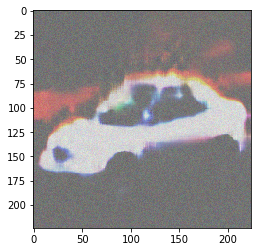

In [183]:
def quantize(img, rgb_range):
    pixel_range = 255 / rgb_range
    return img.mul(pixel_range).clamp(0, 255).round().div(pixel_range)
image = quantize(img_tensor, 1).cpu().detach().numpy()[0].transpose(1,2,0)
print(image)
plt.imshow(image)

tensor([[[0.2863, 0.2863, 0.2863,  ..., 0.7961, 0.7961, 0.7961],
         [0.2863, 0.2863, 0.2863,  ..., 0.7961, 0.7961, 0.7961],
         [0.2863, 0.2863, 0.2863,  ..., 0.7961, 0.7961, 0.7961],
         ...,
         [0.4549, 0.4549, 0.4549,  ..., 0.1059, 0.1059, 0.1059],
         [0.4549, 0.4549, 0.4549,  ..., 0.1059, 0.1059, 0.1059],
         [0.4549, 0.4549, 0.4549,  ..., 0.1059, 0.1059, 0.1059]],

        [[0.3059, 0.3059, 0.3059,  ..., 0.8431, 0.8431, 0.8431],
         [0.3059, 0.3059, 0.3059,  ..., 0.8431, 0.8431, 0.8431],
         [0.3059, 0.3059, 0.3059,  ..., 0.8431, 0.8431, 0.8431],
         ...,
         [0.4706, 0.4706, 0.4706,  ..., 0.1020, 0.1020, 0.1020],
         [0.4706, 0.4706, 0.4706,  ..., 0.1020, 0.1020, 0.1020],
         [0.4706, 0.4706, 0.4706,  ..., 0.1020, 0.1020, 0.1020]],

        [[0.2941, 0.2941, 0.2941,  ..., 0.8745, 0.8745, 0.8745],
         [0.2941, 0.2941, 0.2941,  ..., 0.8745, 0.8745, 0.8745],
         [0.2941, 0.2941, 0.2941,  ..., 0.8745, 0.8745, 0.

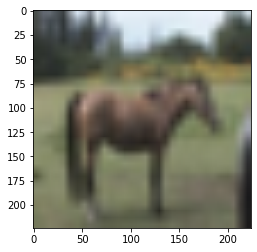

In [181]:
print(img_for_plot)
plt.imshow(img_for_plot.cpu().detach().numpy().transpose(1,2,0))

tensor([[[0.0706, 0.0706, 0.0706,  ..., 0.4196, 0.4196, 0.4196],
         [0.0706, 0.0706, 0.0706,  ..., 0.4196, 0.4196, 0.4196],
         [0.0706, 0.0706, 0.0706,  ..., 0.4196, 0.4196, 0.4196],
         ...,
         [0.3255, 0.3255, 0.3255,  ..., 0.3490, 0.3490, 0.3490],
         [0.3255, 0.3255, 0.3255,  ..., 0.3490, 0.3490, 0.3490],
         [0.3255, 0.3255, 0.3255,  ..., 0.3490, 0.3490, 0.3490]],

        [[0.0627, 0.0627, 0.0627,  ..., 0.3882, 0.3882, 0.3882],
         [0.0627, 0.0627, 0.0627,  ..., 0.3882, 0.3882, 0.3882],
         [0.0627, 0.0627, 0.0627,  ..., 0.3882, 0.3882, 0.3882],
         ...,
         [0.3255, 0.3255, 0.3255,  ..., 0.3490, 0.3490, 0.3490],
         [0.3255, 0.3255, 0.3255,  ..., 0.3490, 0.3490, 0.3490],
         [0.3255, 0.3255, 0.3255,  ..., 0.3490, 0.3490, 0.3490]],

        [[0.0235, 0.0235, 0.0235,  ..., 0.1137, 0.1137, 0.1137],
         [0.0235, 0.0235, 0.0235,  ..., 0.1137, 0.1137, 0.1137],
         [0.0235, 0.0235, 0.0235,  ..., 0.1137, 0.1137, 0.

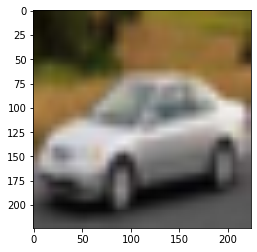

In [187]:
fasfa
print(fasfa)
plt.imshow(fasfa.cpu().detach().numpy().transpose(1,2,0))

ImportError: IntProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html